In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [9]:
df1=pd.read_csv('/content/survey lung cancer.csv')
df1.drop('GENDER', axis=1, inplace=True)
df1['LUNG_CANCER'] = df1['LUNG_CANCER'].replace({'YES': 1, 'NO': 0})
print(df1.head)

<bound method NDFrame.head of      AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
0     69        1               2        2              1                1   
1     74        2               1        1              1                2   
2     59        1               1        1              2                1   
3     63        2               2        2              1                1   
4     63        1               2        1              1                1   
..   ...      ...             ...      ...            ...              ...   
304   56        1               1        1              2                2   
305   70        2               1        1              1                1   
306   58        2               1        1              1                1   
307   67        2               1        2              1                1   
308   62        1               1        1              2                1   

     FATIGUE   ALLERGY   WHEEZING

In [10]:
df2=pd.read_csv('/content/Prostate_Cancer.csv')
df2.drop('diagnosis_result', axis=1, inplace=True)
print(df2.head)

<bound method NDFrame.head of      id  radius  texture  perimeter  area  smoothness  compactness  symmetry  \
0     1      23       12        151   954       0.143        0.278     0.242   
1     2       9       13        133  1326       0.143        0.079     0.181   
2     3      21       27        130  1203       0.125        0.160     0.207   
3     4      14       16         78   386       0.070        0.284     0.260   
4     5       9       19        135  1297       0.141        0.133     0.181   
..  ...     ...      ...        ...   ...         ...          ...       ...   
95   96      23       16        132  1264       0.091        0.131     0.210   
96   97      22       14         78   451       0.105        0.071     0.190   
97   98      19       27         62   295       0.102        0.053     0.135   
98   99      21       24         74   413       0.090        0.075     0.162   
99  100      16       27         94   643       0.098        0.114     0.188   

    fract

In [11]:
df1.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.873786
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [12]:
df2.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)
pd.DataFrame(df1_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02
mean,3.276775e-16,8.048219e-17,1.933010e-16,-1.235976e-16,1.034771e-16,-2.874364e-17,2.586927e-17,-1.350951e-16,-1.350951e-16,-1.580900e-16,1.868336e-16,1.609644e-16,-1.322207e-16,-1.609644e-16,2.040798e-16
std,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00
min,-5.083947e+00,-1.135292e+00,-1.150351e+00,-9.967690e-01,-1.003241e+00,-1.009756e+00,-1.435063e+00,-1.120480e+00,-1.120480e+00,-1.120480e+00,-1.173424e+00,-1.335584e+00,-9.402906e-01,-1.120480e+00,-2.631174e+00
25%,-6.920990e-01,-1.135292e+00,-1.150351e+00,-9.967690e-01,-1.003241e+00,-1.009756e+00,-1.435063e+00,-1.120480e+00,-1.120480e+00,-1.120480e+00,-1.173424e+00,-1.335584e+00,-9.402906e-01,-1.120480e+00,3.800585e-01
50%,-8.212013e-02,8.808303e-01,8.692996e-01,-9.967690e-01,9.967690e-01,9.903379e-01,6.968335e-01,8.924750e-01,8.924750e-01,8.924750e-01,8.522071e-01,7.487363e-01,-9.402906e-01,8.924750e-01,3.800585e-01
75%,7.718503e-01,8.808303e-01,8.692996e-01,1.003241e+00,9.967690e-01,9.903379e-01,6.968335e-01,8.924750e-01,8.924750e-01,8.924750e-01,8.522071e-01,7.487363e-01,1.063501e+00,8.924750e-01,3.800585e-01
max,2.967774e+00,8.808303e-01,8.692996e-01,1.003241e+00,9.967690e-01,9.903379e-01,6.968335e-01,8.924750e-01,8.924750e-01,8.924750e-01,8.522071e-01,7.487363e-01,1.063501e+00,8.924750e-01,3.800585e-01


In [14]:
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)
pd.DataFrame(df2_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,4.440892e-18,-2.969847e-16,-8.437695e-17,-6.911138e-17,2.775558e-17,-1.095235e-15,-1.182388e-16,-1.187384e-15,3.980150e-16
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.714816e+00,-1.617011e+00,-1.399285e+00,-1.900888e+00,-1.574558e+00,-2.246650e+00,-1.457992e+00,-1.899074e+00,-1.441411e+00
25%,-8.574080e-01,-9.990448e-01,-8.186690e-01,-6.061787e-01,-7.108585e-01,-6.335648e-01,-7.594053e-01,-6.911362e-01,-7.015934e-01
50%,0.000000e+00,3.089829e-02,-1.412833e-01,-1.180096e-01,-1.850942e-01,-5.010859e-02,-1.347862e-01,-1.034909e-01,-2.083819e-01
75%,8.574080e-01,8.548528e-01,7.780258e-01,7.415925e-01,6.731040e-01,6.363105e-01,4.980515e-01,5.168014e-01,5.314354e-01
max,1.714816e+00,1.678807e+00,1.697335e+00,3.193050e+00,3.694088e+00,2.764210e+00,3.588272e+00,3.618263e+00,3.983916e+00


In [19]:
X1 = df1.values
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(X1)
y_kmeans1 = kmeans1.predict(X1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
X2 = df2.values
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(X2)
y_kmeans2 = kmeans2.predict(X2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


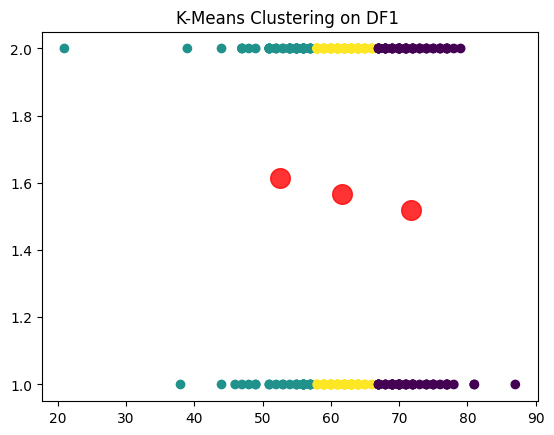

In [22]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans1, cmap='viridis')
centers1 = kmeans1.cluster_centers_
plt.scatter(centers1[:, 0], centers1[:, 1], c='red', s=200, alpha=0.8)
plt.title("K-Means Clustering on DF1 ")
plt.show()

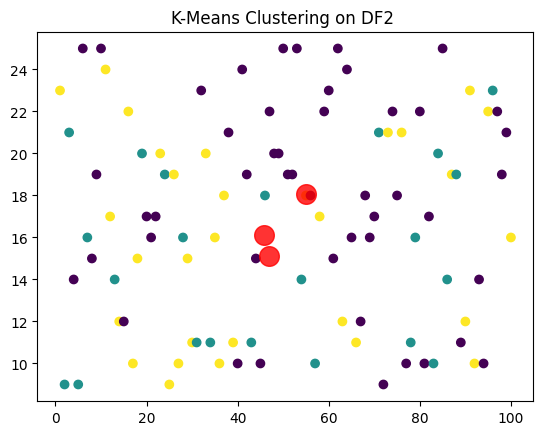

In [25]:
plt.scatter(X2[:, 0], X2[:, 1], c=y_kmeans2, cmap='viridis')
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='red', s=200, alpha=0.8)
plt.title("K-Means Clustering on DF2 ")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


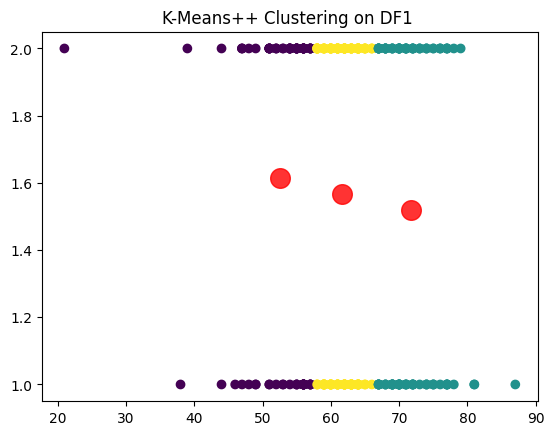

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


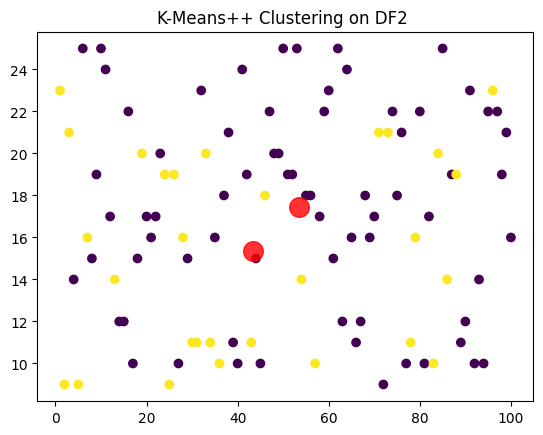

In [27]:
kmeans1 = KMeans(n_clusters=3, random_state=0, init='k-means++')
kmeans1.fit(X1)
y_kmeans1 = kmeans1.predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans1, cmap='viridis')
centers1 = kmeans1.cluster_centers_
plt.scatter(centers1[:, 0], centers1[:, 1], c='red', s=200, alpha=0.8)
plt.title("K-Means++ Clustering on DF1 ")
plt.show()

kmeans2 = KMeans(n_clusters=2, random_state=0, init='k-means++')
kmeans2.fit(X2)
y_kmeans2 = kmeans2.predict(X2)
# Plot the clustered data for the second dataset
plt.scatter(X2[:, 0], X2[:, 1], c=y_kmeans2, cmap='viridis')
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='red', s=200, alpha=0.8)
plt.title("K-Means++ Clustering on DF2 ")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

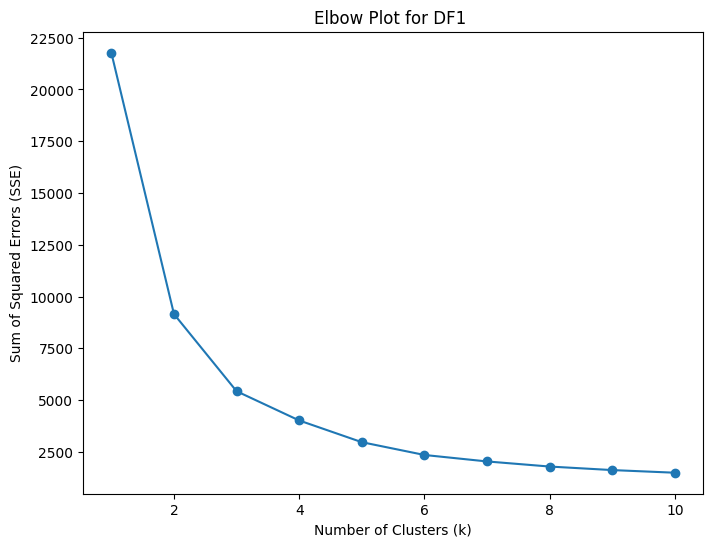

In [29]:
sse1 = []
for k in range(1, 11):
  kmeans1 = KMeans(n_clusters=k, random_state=0, init='k-means++')
  kmeans1.fit(X1)
  sse1.append(kmeans1.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse1, marker='o')
plt.title("Elbow Plot for DF1 ")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

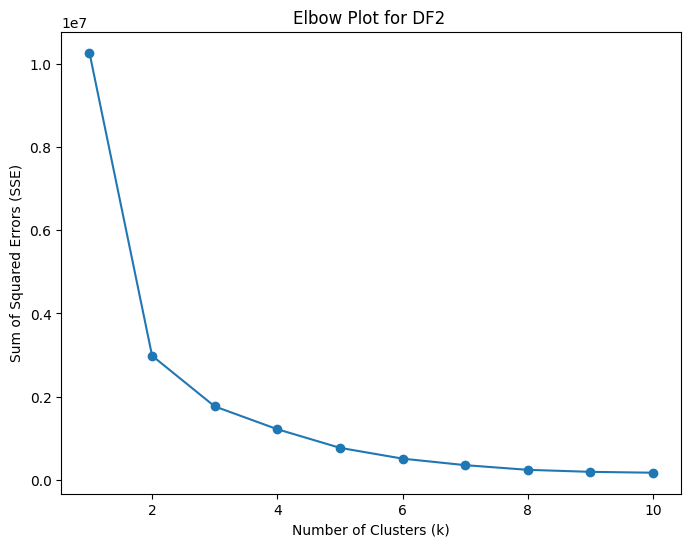

In [31]:
sse2 = []
for k in range(1, 11):
  kmeans2 = KMeans(n_clusters=k, random_state=0, init='k-means++')
  kmeans2.fit(X2)
  sse2.append(kmeans2.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse2, marker='o')
plt.title("Elbow Plot for DF2 ")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

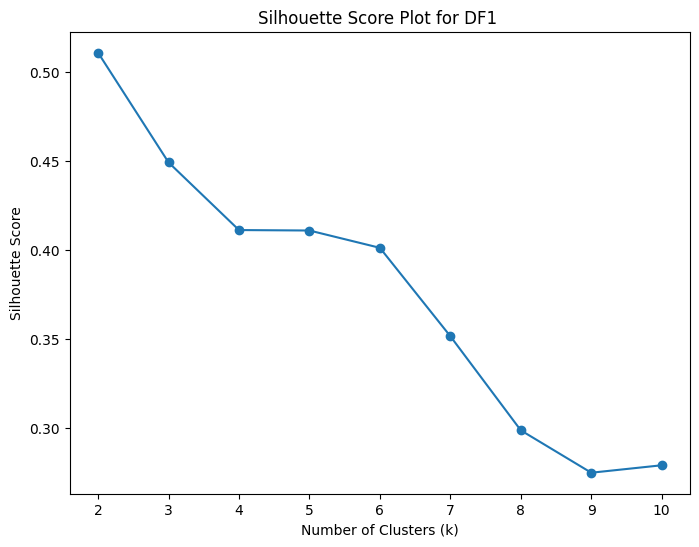

In [33]:
from sklearn.metrics import silhouette_score
X1 = df1.values
silhouette_scores1 = []
for k in range(2, 11):
  kmeans1 = KMeans(n_clusters=k, random_state=0, init='k-means++')
  labels1 = kmeans1.fit_predict(X1)
  silhouette_avg1 = silhouette_score(X1, labels1)
  silhouette_scores1.append(silhouette_avg1)
# Create the silhouette score plot for the first dataset
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores1, marker='o')
plt.title("Silhouette Score Plot for DF1 ")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

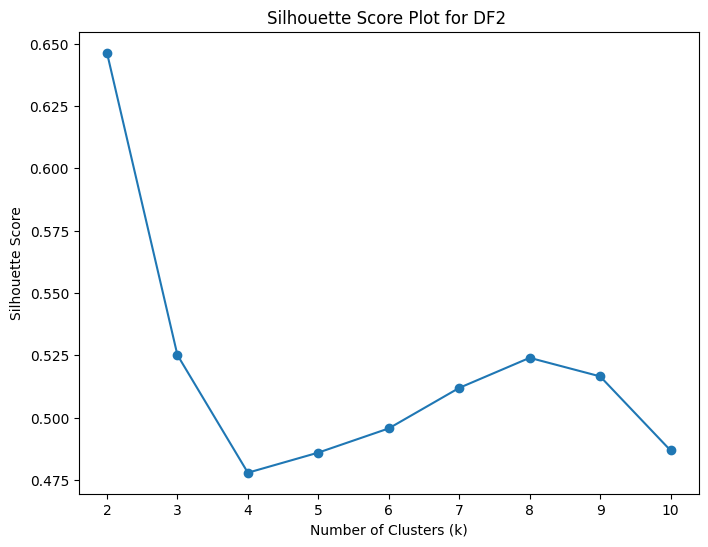

In [34]:
X2 = df2.values
# Calculate silhouette scores for different values of k
silhouette_scores2 = []
for k in range(2, 11):
  kmeans2 = KMeans(n_clusters=k, random_state=0, init='k-means++')
  labels2 = kmeans2.fit_predict(X2)
  silhouette_avg2 = silhouette_score(X2, labels2)
  silhouette_scores2.append(silhouette_avg2)
# Create the silhouette score plot for the second dataset
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores2, marker='o')
plt.title("Silhouette Score Plot for DF2 ")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

StreamKM++: It computes a small weighted sample of the data stream and it uses the k-means++ algorithm as a randomized seeding technique to choose the first values for the clusters. To compute the small sample, it employs coreset constructions using a coreset tree for speed up